## Exercise: Create a Router with LangGraph


Welcome to your Prompt Routing Challenge! In this exercise, you'll build a system that can intelligently route user inputs to different tasks based on an input. This technique is widely used in real-world applications where a single interface must handle multiple tasks — such as summarization, translation, or answering questions.  

Scenario  
Imagine you're building a smart assistant that can handle various types of requests through a single conversation interface. Your assistant should understand the user's intent and respond accordingly — but each task may require a different prompt structure or strategy.  

To manage this complexity, you'll build a node router. This router will evaluate the user input and choose the most appropriate node to use. For example, it should be able to decide whether the user is asking for a summary, a translation, or a general question — and route the request to the correct prompt logic.
  
Challenge  
You're building a text processing application that can:  

Reverse a string (e.g., "hello" → "olleh")  
Convert a string to uppercase (e.g., "hello" → "HELLO")  
Your application should:  

Accept user input and an action type.  
Route to the appropriate node (reverse or upper) based on the action.  
Handle invalid actions gracefully.  
This will be achieved by routing the input through LangGraph nodes using a conditional edge.

0. Import the necessary libs

In [1]:
from typing import TypedDict, Literal
from langgraph.graph import StateGraph, START, END
from IPython.display import Image, display

1. State Schema
We’ll use Python’s TypedDict to define the structure of our state:

input: The user’s input string.
action: The action to be performed (reverse or upper).
output: The processed output.
Then initialize the State Graph with the state schema you have created

In [15]:
# TODO - Create the State Schema class
# class State
class State(TypedDict):
    input: str
    action: Literal["reverse", "upper"]
    output: str

In [16]:
workflow = StateGraph(State)

2. Nodes
Create the logics in your nodes.

Node A should reverse the input  
Node B should convert input to uppercase
Then add the nodes to the workflow.

In [17]:
def node_a(state: State):
    print("Node A\n")

    # TODO - Reverse
    output = state['input'][::-1]
    
    print(f"output: {output}")
    return {"output": output}

In [18]:
def node_b(state: State):
    print("Node B\n")

    # TODO - Uppercase
    output = state['input'].upper()
    
    print(f"output: {output}")
    return {"output": output}

In [19]:
# TODO- Add node A to the workflow
workflow.add_node(node_a)

In [20]:
# TODO - Add node B to the workflow
workflow.add_node(node_b)

3. Routing Function  
Create a routing function to determine which node to execute based on the action. If action is reverse, it should return node A, if action is upper, node B.

In [21]:
# TODO - The routing function
def routing_function(state: State):
    action = state["action"]
    if action == "reverse":
        return "node_a"
    if action == "upper":
        return "node_b"

4. Edges  
Use conditional edges to control the flow of data:  

START → routing_function to decide the path.  
node_a → END for reverse.  
node_b → END for uppercase.  
In add_conditional_edges() method, use source, path and path_map as the necessary arguments for routing.

In [22]:
# TODO - Add your condital edges
workflow.add_conditional_edges(
    source=START, 
    path=routing_function, 
    path_map=["node_a", "node_b"]
)

In [23]:
workflow.add_edge("node_a", END)
workflow.add_edge("node_b", END)

5. Compile and Run  
Compile the graph, display and run it with different actions.

In [24]:
graph = workflow.compile()

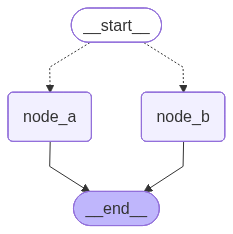

In [25]:
display(
    Image(
        graph.get_graph().draw_mermaid_png()
    )
)

In [26]:
# TODO - Input upper action
graph.invoke(
    input = {
        "input": "Here I go again, on my own, going down the only road I've ever known",
        "action": "upper"
    }, 
)

Node B

output: HERE I GO AGAIN, ON MY OWN, GOING DOWN THE ONLY ROAD I'VE EVER KNOWN


{'input': "Here I go again, on my own, going down the only road I've ever known",
 'action': 'upper',
 'output': "HERE I GO AGAIN, ON MY OWN, GOING DOWN THE ONLY ROAD I'VE EVER KNOWN"}

In [27]:
# TODO - Input reverse action
graph.invoke(
    input = {
        "input": "like a drifter I was born to walk alone",
        "action": "reverse"
    }, 
)

Node A

output: enola klaw ot nrob saw I retfird a ekil


{'input': 'like a drifter I was born to walk alone',
 'action': 'reverse',
 'output': 'enola klaw ot nrob saw I retfird a ekil'}

6. Experiment
Now that you understood how it works, experiment with new things.

Test different scenarios, like passing "lower" as the actions
Make it more robust when this case happen
Add more actions

Summary: Router with LangGraph  
Overview  
This exercise focuses on building a simple router workflow using LangGraph. Learners create a branching logic where inputs are routed dynamically to different nodes based on specified actions ("reverse" or "upper"), illustrating how control flow and routing work within LangGraph.
  
Key Steps Covered  
1. Setup and Imports  
All necessary libraries are imported.
Environment is prepared to use LangGraph components.  
2. State Schema Definition  
A State class is created using TypedDict to define the schema for the workflow's input and output.
The State includes:
input (string)
action (string constrained by a Literal type to either "reverse" or "upper")
output (string)
class State(TypedDict):
  input: str
  action: Literal["reverse", "upper"]
  output: str  
3. Node Functions  
Two nodes are defined:  
Node A: Reverses the input string.
Node B: Converts the input string to uppercase.
def node_a(state):  
  return {"output": state["input"][::-1]}

def node_b(state):  
  return {"output": state["input"].upper()}  
4. Workflow Creation  
A workflow object is created.
Nodes A and B are added to the workflow using add_node().
workflow.add_node("node_a", node_a)
workflow.add_node("node_b", node_b)
5. Routing Function  
A routing function directs execution to the appropriate node based on the action specified in the input.
def router(state):
  if state["action"] == "reverse":
      return "node_a"
  elif state["action"] == "upper":
      return "node_b"
6. Defining Edges
Edges are defined in the workflow:
From start to either node_a or node_b, based on the router function.
From both node_a and node_b to end.
workflow.add_edge("start", router)
workflow.add_edge("node_a", "end")
workflow.add_edge("node_b", "end")
7. Compilation and Visualization
The workflow graph is compiled and visualized, showing:
Start → Router → Node A or Node B → End
8. Testing the Router
Inputs are tested:
With action "upper": Input is converted to uppercase.
With action "reverse": Input is reversed.
graph.invoke({"input": "some input", "action": "upper"})
# Output: "SOME INPUT"

graph.invoke({"input": "some input", "action": "reverse"})
# Output: "tupni emos"
An error initially occurred because the State class was missing its base class (TypedDict), but it was corrected, and the workflow executed as expected.
9. Encouraged Exploration
Learners are invited to:
Add more actions (e.g., "lower", "capitalize").
Improve error handling for unsupported actions.
Make the router more flexible and robust.

## Managing State in LangGraph
State management is essential in LangGraph workflows, where a StateGraph tracks inputs, outputs, and intermediate data. Understanding how to define and manage state properly improves reliability and control in AI-driven workflows.  

State Machines and LangGraph  
State-based systems are not new. State Machines—like traffic light controllers—transition between predefined states based on logic and conditions. In LangGraph, workflows follow a similar approach, where nodes represent states and edges define transitions.  

Defining State Schemas  
State schemas define what data is stored and updated as the workflow runs. Two common methods exist:  

TypedDict – A lightweight approach for defining structured key-value pairs.  

Pydantic – A more robust option with built-in validation for production use.  

Using TypedDict (Simple, No Validation)  
TypedDict works well for small states but does not enforce validation.  

from typing_extensions import TypedDict  

class State(TypedDict):  
      color: str  
If incorrect data is passed, LangGraph won’t raise an error, which can lead to unintended behavior:  

graph.invoke({"color": 2})  # No error, but incorrect state handling  
Using Pydantic (Validated, More Reliable)  
Pydantic ensures type safety and prevents incorrect inputs.  

from pydantic import BaseModel  

class State(BaseModel):  
      color: str  
Now, if an invalid value is passed, LangGraph raises an error:  

graph.invoke({"color": 2})  
# ValidationError: Input should be a valid string  
Final Thoughts  
When designing LangGraph workflows, take the time to define a structured state that aligns with your application’s needs.  

Use TypedDict for lightweight, simple state management.  
Use Pydantic for complex, validated workflows to prevent data inconsistencies.  
Proper state design improves reliability, ensuring your workflow behaves predictably while handling data dynamically.  

## Summary: State Schemas and State Machines in LangGraph  
Overview  
This demo explores how to define state schemas for workflows using both TypedDict and Pydantic, and how to implement state machines in LangGraph, including basic workflows and conditional branching with repeatable flows.
  
Key Steps Covered  
1. TypedDict vs. Pydantic for State Definition
a. Using TypedDict  
A simple State is defined using TypedDict with:
input_color: Literal["green", "yellow", "red"]
output_color: Literal["green", "yellow", "red"]
class State(TypedDict):
  input_color: Literal["green", "yellow", "red"]
  output_color: Literal["green", "yellow", "red"]
A color_node randomly selects an output color based on the input.
def color_node(state):
  output_color = random.choice(["green", "yellow", "red"])
  return {"output_color": output_color}
Problem: TypedDict does not enforce type validation at runtime.
Even invalid inputs like "black" pass silently.  
b. Using Pydantic  
Same state but now using BaseModel from Pydantic for strict validation.
class State(BaseModel):
  input_color: Literal["green", "yellow", "red"]
  output_color: Literal["green", "yellow", "red"]
Benefits:  
Validation errors are raised if an invalid color is passed.
Errors show exactly which field failed validation.
State(input_color="black", output_color="green")  # Raises validation error
Note:  
Pydantic uses dot notation (state.input_color), not dictionary subscripting (state["input_color"]).  
2. Simple Color Workflow  
A basic StateGraph is created.
Nodes:
One color_node operating on state.
Edges:
start → color_node → end
workflow.add_node("color_node", color_node)
workflow.add_edge("start", "color_node")
workflow.add_edge("color_node", "end")
Invocations generate random color transitions based on input.
3. Traffic Light State Machine  
a. Extended State Definition
A more complex State is defined with:
color: str
repeat_mode: bool
messages: list
counter: int
class State(BaseModel):
  color: str
  repeat_mode: bool
  messages: List[str]
  counter: int
b. Node Definitions
green_light_node: Waits 60 seconds (simulated), sets color to green.
yellow_light_node: Waits 3 seconds, sets color to yellow.
red_light_node: Waits 15 seconds, sets color to red.
Each node updates the state and logs its action to the messages list.
  
def green_light_node(state):
  # Simulate green light action
  return {"color": "green", "counter": state.counter + 1}
c. Conditional Router  
After red_light_node, a conditional router (should_repeat) decides:
If repeat_mode is True and counter <= 3, loop back to green_light_node.
Else, terminate the workflow.
def should_repeat(state):
  if state["repeat_mode"] and state["counter"] <= 3:
      return "green_light"
  return "end"
d. Workflow Construction  
Nodes added: green, yellow, red.
Edges:
start → green_light
green_light → yellow_light
yellow_light → red_light
red_light → (conditional router) → green_light or end
workflow.add_edge("red_light", should_repeat)
workflow.add_conditional_edges(should_repeat, path_map={"green_light": "green_light", "end": "end"})
e. Execution Example
If repeat_mode=True, the lights cycle through green → yellow → red up to 3 times.
If repeat_mode=False, the lights complete only one full cycle.
state = {"color": "green", "repeat_mode": True, "messages": [], "counter": 0}
Outputs trace each light transition and counter increment.  
4. Key Concepts Highlighted  
TypedDict is flexible but weak on validation; Pydantic enforces strong runtime validation.
State graphs allow for sequential and conditional flows.
Conditional branching enables looping behaviors like state machines.
LangGraph easily supports both simple workflows and complex event-driven state transitions.  
5. Conclusion  
TypedDict is useful for simple, lenient workflows.
Pydantic is essential for robust, validated workflows.
LangGraph provides the control and flexibility needed to build real-world, multi-path workflows with clear state management.

## Summary: Using Reducers in LangGraph
Overview
This demo explains reducers in LangGraph—mechanisms that allow safe merging of parallel updates to the same field in a workflow’s state. It walks through basic examples with integers, lists, and LangChain messages, highlighting how reducers prevent conflicts when nodes operate in parallel.

Key Steps Covered
1. Recap: Sequential Data Processing
A basic state was created with:

input: integer
output: integer
Two nodes:

node_a: Adds a random offset to input.
node_b: Adds another random offset to the result from node_a.
class State(TypedDict):
  input: int
  output: int
Sequential flow: start → node_a → node_b → end.
Example:
Input: 1
Offset node_a: +13 → 14
Offset node_b: +3 → 17
2. Problem with Parallel Execution
Changing the workflow so start sends the state to both node_a and node_b in parallel causes a problem:
Both nodes try to update the output field at the same time.
Results in an InvalidUpdateError because the output field was designed to store only a single integer.
workflow.add_edge("start", "node_a")
workflow.add_edge("start", "node_b")
The system cannot automatically merge two integer outputs.
3. Solution: Reducers
Reducers resolve conflicts by defining how to combine multiple updates to the same field.
Example:
Using operator.add to concatenate two lists.
Now output becomes a list instead of an integer.
class State(TypedDict):
  input: int
  output: List[int]  # Note: output is now a list
Example run:

node_a produces 9
node_b produces 4
Final output: [9, 4]
The reducer ensures both results are preserved.

4. Reducers with LangChain Messages
In workflows involving messages, a simple operator.add doesn’t work well when merging structured messages.
Instead, LangGraph provides the add_messages reducer.
from langgraph.reducers import add_messages
This handles merging messages (e.g., SystemMessage, HumanMessage, AIMessage) properly into a list.
5. Creating a Workflow with MessageState
A MessageState is used instead of custom schema:
It automatically sets up messages with the add_messages reducer.
from langgraph.graph.message import MessageState
Node:

Receives the user’s question.
Passes it to the LLM.
Captures the AI's answer.
Example:

Input: "What is the name of Ash’s first Pokémon?"
Output: "Ash’s first Pokémon is Pikachu."
6. Key Concepts Highlighted
Sequential workflows are simple because each node modifies the state one after another.
Parallel workflows require reducers to avoid update conflicts.
Reducers define how to merge concurrent updates:
Adding numbers → Sum
Adding lists → Concatenation
Adding messages → Message aggregation
MessageState simplifies using LangChain messages in workflows without needing custom schemas.
7. Conclusion
Reducers are critical for safe and correct parallel execution in LangGraph.
They allow multiple nodes to contribute to the same field without data loss or collisions.
Properly designing state and reducers enables scalable, modular graph workflows.